In [1]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

In [2]:
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

In [3]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import _joint_probabilities,_kl_divergence
#from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

In [6]:
import sys
path=r'train'
sys.path.insert(0, path+'train')
from DeepFaciesUtils.Utils import *

ModuleNotFoundError: No module named 'DeepFaciesUtils'

In [6]:
#!pip install --user moviepy

In [7]:
# We'll generate an animation with matplotlib and moviepy.
#from moviepy.video.io.bindings import mplfig_to_npimage
#import moviepy.editor as mpy
import pandas as pd 


## Read DataSet

In [8]:
!ls Dataset/

 Dataset-Contex.xls
 Dataset_Petrobras_NEW.xlsx
'EstByWell(context).xlsx'
'EstByWell(context-2-all).xlsx'
'EstByWell(context-2-all-without-PE).xlsx'
'EstByWell(context-3).xlsx'
'EstByWell(context-3-all).xlsx'
'EstByWell(context-3-all-without-PE).xlsx'
 context-with-angle.xlsx
 dataset.csv


In [9]:
data  = read_CSV('Dataset/dataset.csv',sep=';')
data.head()

   Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664       9.9  11.915   
1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661      14.2  12.565   
2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658      14.8  13.050   
3       3     A1 SH  SHRIMPLIN  2794.5  86.10      0.655      13.9  13.115   
4       3     A1 SH  SHRIMPLIN  2795.0  74.58      0.647      13.5  13.300   

    PE  NM_M  RELPOS Facies Numerica  
0  4.6     1   1.000             RT4  
1  4.1     1   0.979             RT4  
2  3.6     1   0.957             RT4  
3  3.5     1   0.936             RT4  
4  3.4     1   0.915             RT4  


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies Numerica
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,RT4
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,RT4
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,RT4
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,RT4
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,RT4


In [10]:
data['Facies'].unique()

array([3, 2, 8, 6, 7, 4, 5, 9, 1])

In [11]:
#data[data.values<0]

In [12]:
y=data['Well Name']
y.shape

(3232,)

In [13]:
#del data['poco'] 
del data['Depth'] 
#del data['ILD_log10']
#del data['NM_M']
#del data['Inv_log']
#del data['IGR']
del data['Facies Numerica']
del data['Formation']

In [14]:
data.head()

,Facies,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,SHRIMPLIN,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,SHRIMPLIN,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,SHRIMPLIN,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,SHRIMPLIN,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,SHRIMPLIN,74.58,0.647,13.5,13.300,3.4,1,0.915


In [15]:
data['Well Name']=data['Well Name'].astype('category')
data['Well Name']= data['Well Name'].cat.codes


#data['Formation_cat'] = data['Formation'].astype('category')
#data['Formation_cat'] = data['Formation_cat'].cat.codes
#del data['Formation']
data.head()

,Facies,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,7,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,7,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,7,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,7,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,7,74.58,0.647,13.5,13.300,3.4,1,0.915


In [16]:
from sklearn import preprocessing
x  = data.values[:,2:data.values.shape[-1]] #returns a numpy array
scaler = preprocessing.StandardScaler()
X_data = scaler.fit_transform(x)
XP  = data.values[:,0] #returns a numpy array
wells  = data.values[:,1] #returns a numpy array
X_data.shape,XP.shape,wells.shape

((3232, 7), (3232,), (3232,))

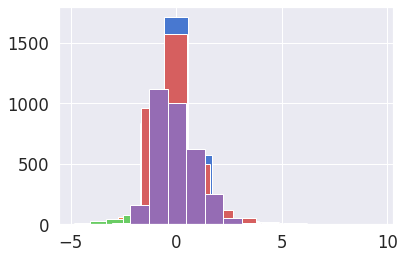

In [17]:
plt.hist(X_data[:,0]),plt.hist(X_data[:,1]),plt.hist(X_data[:,2]),plt.hist(X_data[:,3]),plt.hist(X_data[:,4]);

(array([259., 738., 615., 184.,   0., 217., 462.,  98., 498., 161.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

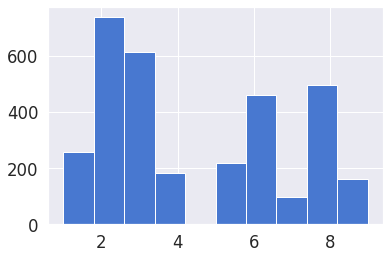

In [18]:
plt.hist(XP)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
Ind_train, Index_test, Label_train, label_test = train_test_split(range(len(XP)), XP, test_size=0.33, random_state=42)

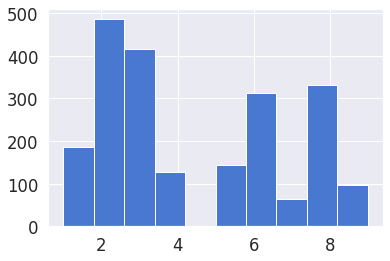

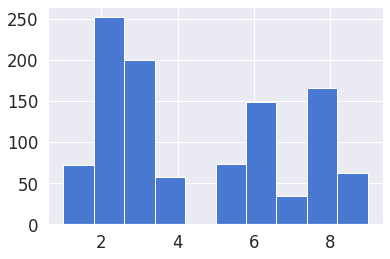

In [21]:
plt.hist(Label_train)
plt.show()
plt.hist(label_test)
plt.show()


In [22]:
X_data.min(),X_data.max()

(-4.85672620777056, 9.562843712384097)

In [23]:
ITER=50000

In [24]:
n_components=2
perfil_proj = TSNE(n_components=n_components,random_state=RS,n_iter=ITER,verbose=1,learning_rate=120).fit_transform(X_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3232 samples in 0.003s...
[t-SNE] Computed neighbors for 3232 samples in 0.198s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3232
[t-SNE] Computed conditional probabilities for sample 2000 / 3232
[t-SNE] Computed conditional probabilities for sample 3000 / 3232
[t-SNE] Computed conditional probabilities for sample 3232 / 3232
[t-SNE] Mean sigma: 0.478348
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.461960
[t-SNE] KL divergence after 23900 iterations: 0.924676


n_components=2
perfil_proj = TSNE(n_components=n_components,random_state=RS,n_iter=ITER,verbose=1,learning_rate=160).fit_transform(X_data)

In [25]:
# With 3-all
# 80 : KL divergence after 8100 iterations: 0.790965
# 90 : KL divergence after 5850 iterations: 0.790922
# 100 : KL divergence after 7800 iterations: 0.790439
# 120 : KL divergence after 10450 iterations: 0.782517 OK 
# 130 : KL divergence after 7300 iterations: 0.790601
# 135 : KL divergence after 4150 iterations: 0.793655
# 140 : KL divergence after 6800 iterations: 0.792394
# 145 : KL divergence after 7300 iterations: 0.795258
# 150 : KL divergence after 8600 iterations: 0.784209
# 160 : KL divergence after 5350 iterations: 0.789845
# 180 : KL divergence after 8250 iterations: 0.788371
# 200 : KL divergence after 9600 iterations: 0.780918

In [26]:
# With 2-all
# 80 : KL divergence after 26450 iterations: 0.923490
# 90 : KL divergence after 32650 iterations: 0.926101
# 100 : KL divergence after 25150 iterations: 0.921970
# 120 : KL divergence after 23900 iterations: 0.924676
# 130 : KL divergence after 19100 iterations: 0.928634
# 135 : KL divergence after 21350 iterations: 0.932301
# 140 : KL divergence after 25700 iterations: 0.921733
# 145 : KL divergence after 18550 iterations: 0.930708
# 150 : KL divergence after 27800 iterations: 0.920964
# 160 : KL divergence after 18500 iterations: 0.928862
# 180 : KL divergence after 22350 iterations: 0.920949 OK
# 200 : KL divergence after 24700 iterations: 0.922428

In [27]:
#  80 : KL divergence after 20950 iterations: 1.048948
#  90 : KL divergence after 19850 iterations: 1.047746
# 100 : KL divergence after 20150 iterations: 1.046791
# 120 : KL divergence after 19300 iterations: 1.046394
# 130 : KL divergence after 17750 iterations: 1.045580
# 135 : KL divergence after 12800 iterations: 1.049633
# 140 : KL divergence after 22350 iterations: 1.041275
# 145 : KL divergence after 11850 iterations: 1.046810
# 150 : KL divergence after 16850 iterations: 1.041563
# 160 : KL divergence after 13700 iterations: 1.044191
# 180 : KL divergence after 16850 iterations: 1.046493
# 200 : KL divergence after 17400 iterations: 1.047397

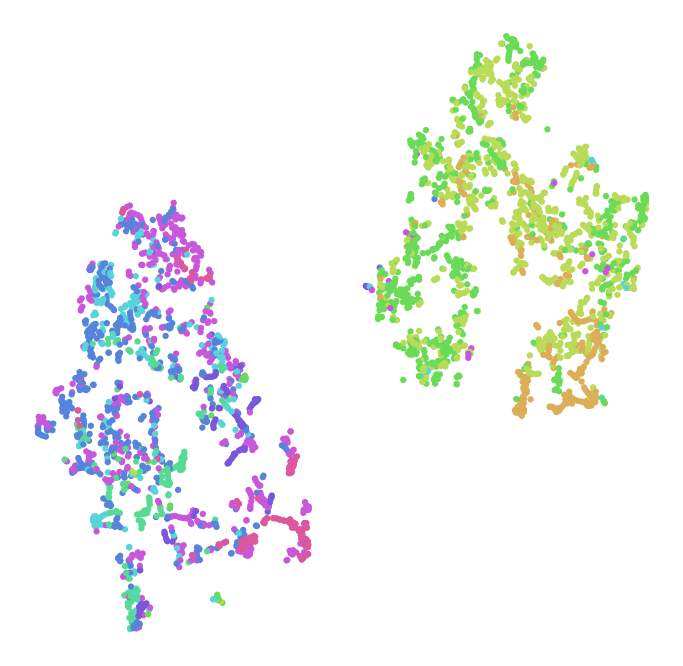

In [28]:
if n_components==2:
    scatter(perfil_proj,XP,isGroup=False,int_=10);

perfil_proj_label=np.load('perfil_proj_label.npy')
label=np.load('label.npy')
perfil_proj=np.load('perfil_proj.npy')

In [29]:
def DatosByWell(M,XP,well=1):
    return M[XP==well]

In [30]:
wells

array([7., 7., 7., ..., 0., 0., 0.])

In [31]:
XP_label=wells[Ind_train]
XP_not_label=wells[Index_test]
perfil_proj_label=perfil_proj[Ind_train]
perfil_proj_not_label=perfil_proj[Index_test]
perfil_proj_label.shape,XP_label.shape,perfil_proj_not_label.shape,XP_not_label.shape

((2165, 2), (2165,), (1067, 2), (1067,))

In [32]:
Mdis=XP_not_label.copy()
Estimativa=XP_not_label.copy()


In [33]:
XP.shape

(3232,)

In [34]:
for w in range(8):
    dis_w,label_estw=get_label_with_distance(DatosByWell(perfil_proj_not_label,XP_not_label,well=w),
                                             DatosByWell(perfil_proj_label,XP_label,well=w),DatosByWell(XP[Ind_train],XP_label,well=w))
    Mdis[XP_not_label==w]=dis_w[:,0]
    Estimativa[XP_not_label==w]=label_estw[:,0]

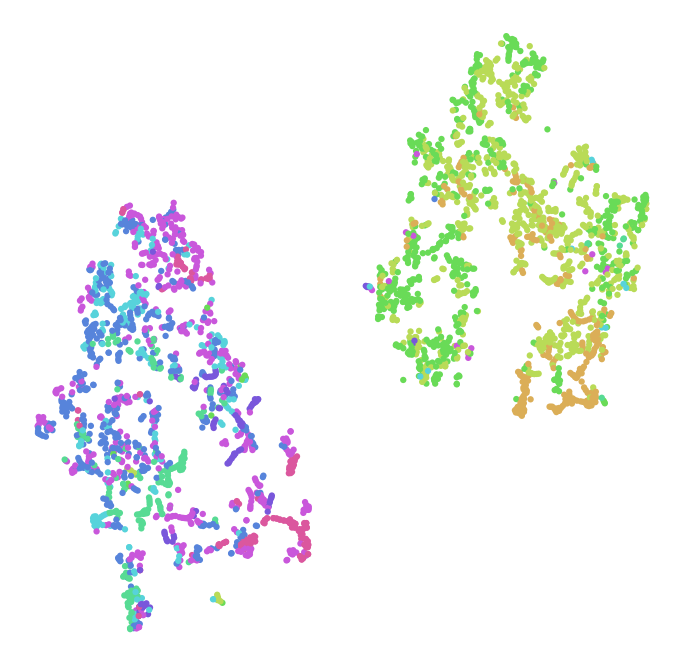

In [35]:
if n_components==2:
    scatter(np.concatenate((perfil_proj_not_label,perfil_proj_label),axis=0),
        np.concatenate((Estimativa,XP[Ind_train]),axis=0),isGroup=False,int_=10);

In [36]:
w=0

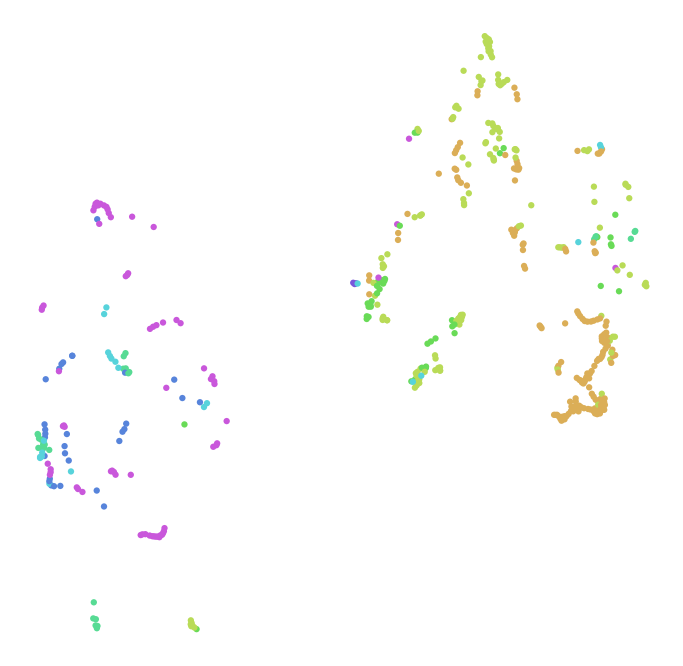

In [37]:
w=1+w
dis_,label_est=get_label_with_distance(DatosByWell(perfil_proj_not_label,XP_not_label,well=w),
                                             DatosByWell(perfil_proj_label,XP_label,well=w),DatosByWell(XP[Ind_train],XP_label,well=w))
if n_components==2:
    scatter(np.concatenate((DatosByWell(perfil_proj_not_label,XP_not_label,well=w),
                        DatosByWell(perfil_proj_label,XP_label,well=w)),axis=0),
        np.concatenate((label_est[:,0],DatosByWell(XP[Ind_train],XP_label,well=w)),axis=0),isGroup=False,int_=10);

In [38]:
w=0

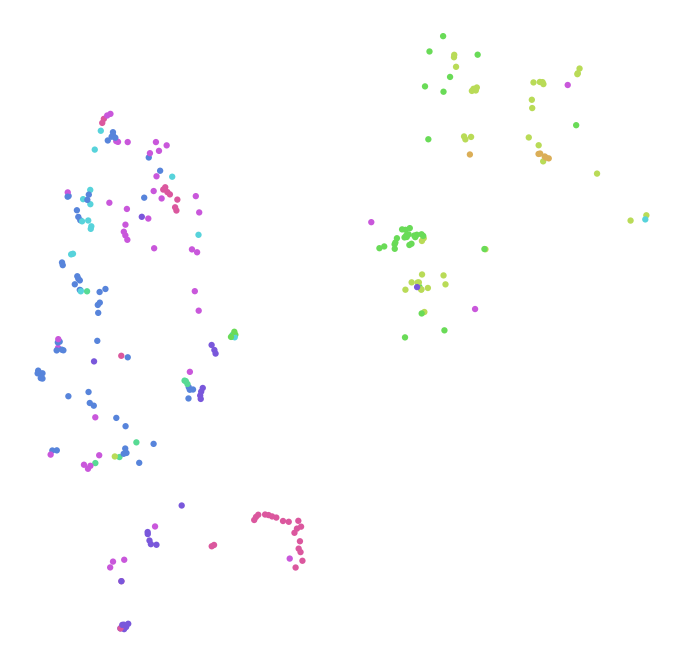

In [39]:
if n_components==2:
    scatter(DatosByWell(perfil_proj_label,XP_label,well=w),
        DatosByWell(XP[Ind_train],XP_label,well=w),isGroup=False,int_=10);

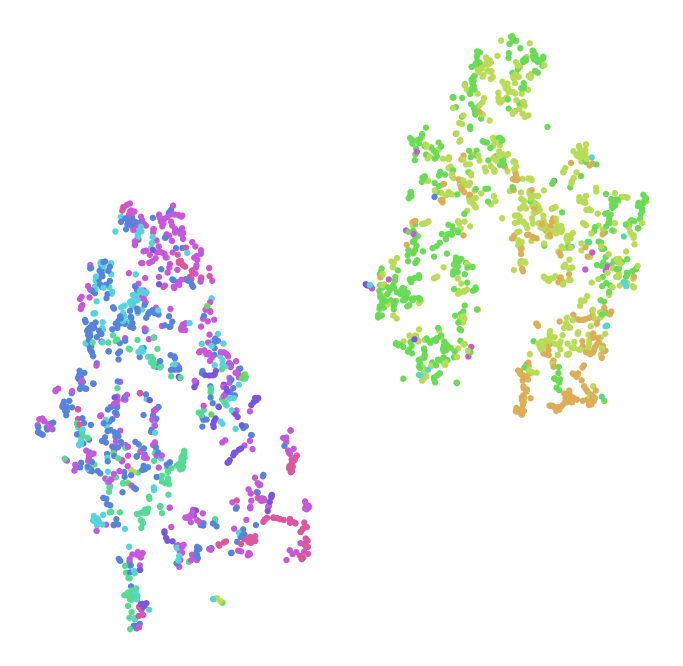

In [40]:
if n_components==2:
    scatter(perfil_proj_label, XP[Ind_train],isGroup=False,int_=10)
#plt.savefig('perfil_tsne-generated.png', dpi=240)

In [41]:
len(Ind_train)

2165

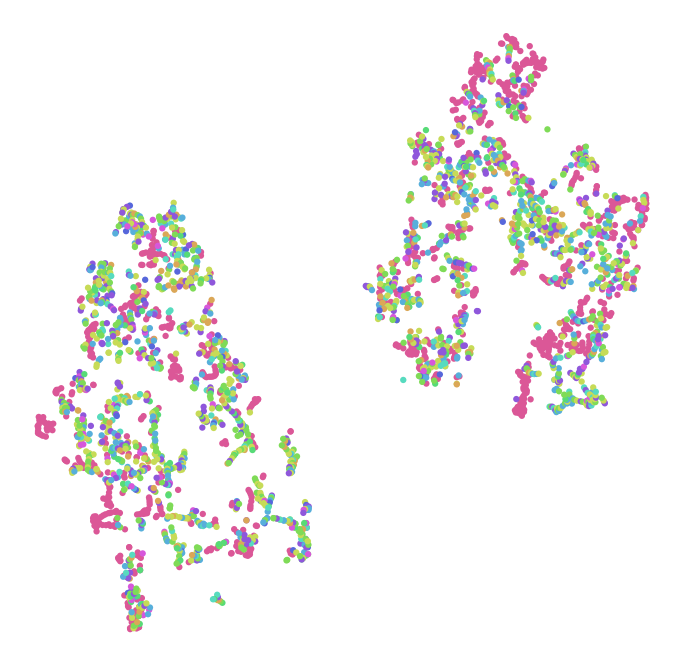

In [42]:
if n_components==2:
    scatter(perfil_proj, np.append([10]*len(Index_test),XP[Ind_train]),isGroup=False,int_=11)
#plt.savefig('perfil_tsne-generated.png', dpi=240)

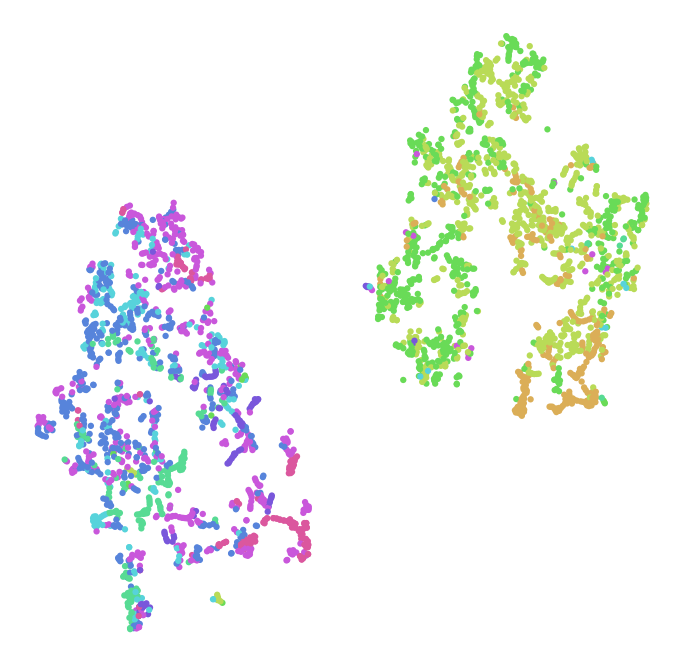

In [43]:
if n_components==2:
    scatter(np.concatenate((perfil_proj_not_label,perfil_proj_label),axis=0),
        np.concatenate((Estimativa,XP[Ind_train]),axis=0),isGroup=False,int_=10);

np.save('perfil_proj',perfil_proj)
np.save('perfil_proj_label',perfil_proj_label)
np.save('label',label)


In [44]:
import pandas as pd 
data_all  = read_CSV('Dataset/dataset.csv',sep=';')
data_all.head()

   Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664       9.9  11.915   
1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661      14.2  12.565   
2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658      14.8  13.050   
3       3     A1 SH  SHRIMPLIN  2794.5  86.10      0.655      13.9  13.115   
4       3     A1 SH  SHRIMPLIN  2795.0  74.58      0.647      13.5  13.300   

    PE  NM_M  RELPOS Facies Numerica  
0  4.6     1   1.000             RT4  
1  4.1     1   0.979             RT4  
2  3.6     1   0.957             RT4  
3  3.5     1   0.936             RT4  
4  3.4     1   0.915             RT4  


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies Numerica
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,RT4
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,RT4
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,RT4
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,RT4
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,RT4


In [45]:
Estimativa.shape,Mdis.shape

((1067,), (1067,))

In [46]:
New_Estimate=XP.copy()
Dis_Estimate=0*XP.copy()
IsTest=XP.copy()

In [47]:
New_Estimate[Index_test]=Estimativa
Dis_Estimate[Index_test]=Mdis


In [48]:
IsTest[Index_test]=True
IsTest[Ind_train]=False

In [49]:
#data_all.insert(7, 'Estimate Classe', label_est[:-len(label),0])
#data_all.insert(8, 'Dist', dis_[:-len(label),0])
data_all.insert(12, 'Estimate Classe', New_Estimate)
data_all.insert(13, 'Dist', Dis_Estimate)
data_all.insert(14, 'IsTest',IsTest)

In [50]:
data_all.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies Numerica,Estimate Classe,Dist,IsTest
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,RT4,3.0,2.064233,1.0
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,RT4,3.0,0.000000,0.0
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,RT4,3.0,0.000000,0.0
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,RT4,3.0,0.000000,0.0
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,RT4,3.0,0.000000,0.0


In [51]:
#pd.concat([data_all,df],axis=0).to_excel('EstimadorClasse('+str(ITER)+').xlsx')
#data_all.to_excel('Dataset/EstByWell(context-2-all).xlsx')

In [52]:
#!pip install --user openpyxl

In [53]:
import pandas as pd

In [54]:
#data_n=pd.read_excel('Dataset/EstByWell(context-3-all).xlsx',index_col='Unnamed: 0')
#data_n.head()

In [55]:
err_=XP[Index_test]-Estimativa
100*sum(err_==0)/len(XP[Index_test])

78.1630740393627

In [56]:
from sklearn.metrics import confusion_matrix
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS','WS', 'D','PS', 'BS']

In [57]:
conf = confusion_matrix(label_test, Estimativa)
display_cm(conf, facies_labels, hide_zeros=True,display_metrics=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total

     True
       SS    65     6           1                                  72

     CSiS     8   202    38     1     1           1     1         252

     FSiS     2    44   150     1                 1     2         200

     SiSh           2          44     2     3           6          57

       MS     1           1     5    48     3     3    12          73

       WS                 2     8     4   113     1    21         149

        D                 1           1     2    27     4          35

       PS           1     1     7     7    22     1   126     1   166

       BS                             1           1     2    59    63


Precision  0.86  0.79  0.78  0.66  0.75  0.79  0.77  0.72  0.98  0.78

   Recall  0.90  0.80  0.75  0.77  0.66  0.76  0.77  0.76  0.94  0.78

       F1  0.88  0.80  0.76  0.71  0.70  0.77  0.77  0.74  0.96  0.78



In [58]:
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])


In [59]:
display_adj_cm(conf, facies_labels, adjacent_facies, 
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total

     True
       SS    71                 1                                  72

     CSiS         248           1     1           1     1         252

     FSiS     2         194     1                 1     2         200

     SiSh           2          46           3           6          57

       MS     1           1          56           3    12          73

       WS                 2     8         139                     149

        D                 1           1          33                35

       PS           1     1     7     7               150         166

       BS                             1                      62    63


Precision  0.96  0.99  0.97  0.72  0.85  0.98  0.87  0.88  1.00  0.94

   Recall  0.99  0.98  0.97  0.81  0.77  0.93  0.94  0.90  0.98  0.94

       F1  0.97  0.99  0.97  0.76  0.81  0.96  0.90  0.89  0.99  0.94

